## Aim
#### To determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides, or damaged by other reasons.

## Data Description
#### We have two datasets given to train and test.
+ ID: UniqueID 
+ Estimated_Insects_Count: Estimated insects count per square meter 
+ Crop_Type: Category of Crop(0,1) 
+ Soil_Type: Category of Soil (0,1) 
+ Pesticide_Use_Category: Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using) 
+ Number_Doses_Week: Number of doses per week 
+ Number_Weeks_Used: Number of weeks used 
+ Number_Weeks_Quit: Number of weeks quit 
+ Season: Season Category (1,2,3) 
+ Crop_Damage: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_tn=pd.read_csv("train.csv")
df_tn["source"]="train"
df_tst=pd.read_csv("test.csv")
df_tst["source"]="test"
df=df_tn
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1,train
2,F00000004,257,1,0,1,0,0.0,0,2,1,train
3,F00000005,257,1,1,1,0,0.0,0,2,1,train
4,F00000006,342,1,0,1,0,0.0,0,2,1,train


In [3]:
df.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
88853,F00155935,3337,1,0,2,10,12.0,44,3,0,train
88854,F00155938,3516,1,0,2,10,20.0,38,1,0,train
88855,F00155939,3516,1,0,2,15,40.0,8,2,0,train
88856,F00155942,3702,1,0,2,10,25.0,18,3,0,train
88857,F00155945,3895,1,0,2,20,37.0,7,3,0,train


##### To determine to count of unique values in the train dataset and pront the unique values if there are less than 5.

In [3]:
for i in df.columns:
    a=df[i].unique()
    len(a)
    print("Column Name:",i)
    print("Count of Unique Values:",len(a))
    if len(a)<5:
        print("Unique Values:",a)
    print()

Column Name: ID
Count of Unique Values: 88858

Column Name: Estimated_Insects_Count
Count of Unique Values: 71

Column Name: Crop_Type
Count of Unique Values: 2
Unique Values: [1 0]

Column Name: Soil_Type
Count of Unique Values: 2
Unique Values: [0 1]

Column Name: Pesticide_Use_Category
Count of Unique Values: 3
Unique Values: [1 3 2]

Column Name: Number_Doses_Week
Count of Unique Values: 20

Column Name: Number_Weeks_Used
Count of Unique Values: 65

Column Name: Number_Weeks_Quit
Count of Unique Values: 51

Column Name: Season
Count of Unique Values: 3
Unique Values: [1 2 3]

Column Name: Crop_Damage
Count of Unique Values: 3
Unique Values: [0 1 2]

Column Name: source
Count of Unique Values: 1
Unique Values: ['train']



In [4]:
df.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
source                         1
dtype: int64

In [5]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'source'],
      dtype='object')

In [6]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
source                        0
dtype: int64

##### Observation 
+ Number_Weeks_Used has 9000  missing data.

In [7]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [8]:
#Replacing null values with mean of the particular coloumn
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

In [9]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
source                     0
dtype: int64

##### Observation 
+ Null values in Number_Weeks_Used has been replaced.

In [10]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.747567,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.623970,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [11]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
source                      object
dtype: object

In [12]:
df.dtypes.value_counts()

int64      8
object     2
float64    1
dtype: int64

<AxesSubplot:>

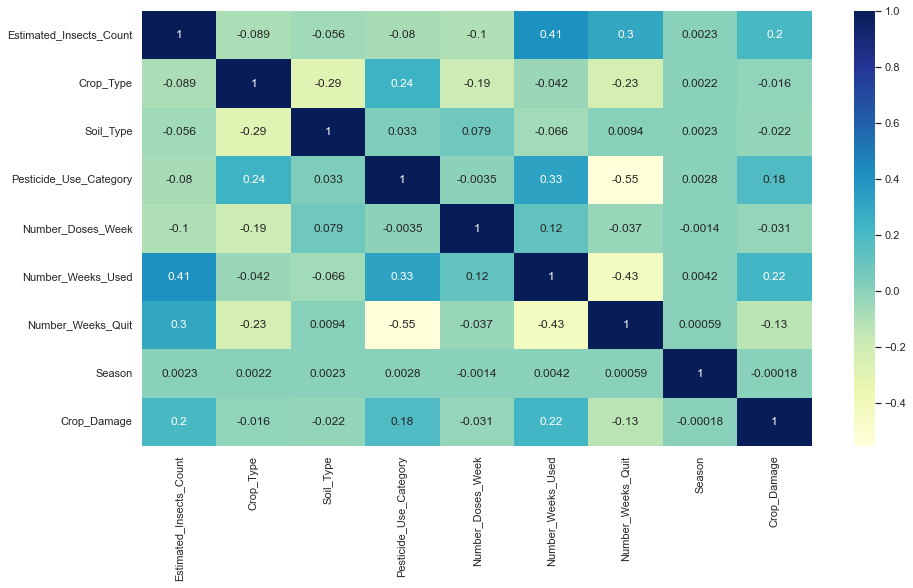

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

##### Observation:
+ Estimated_Insects_count,Pesticide_use_category and Number_weeks_used are positively correlated with Crop damage.

+ Number_weeks_used  is positively correlated with Estimated_Insects_count and Pesticide_use_category. 

+ Number_weeks_Quit is highly negatively correlated with Pesticide_use_category and Number_weeks_used.

## Univariate Analysis

#### Crop Damage

<Figure size 864x360 with 0 Axes>

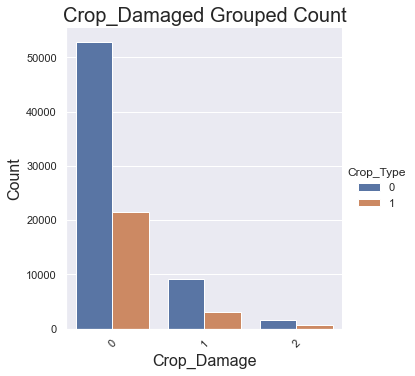

In [14]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Damage', data=df,kind='count',hue='Crop_Type')
plt.xlabel("Crop_Damage", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Crop_Damaged Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

##### Observation:
+ Crop damage due to pesticides are less in comparison to damage due to other causes.

+ Crop type 0 has higher chance of survival compared to crop type 1. 

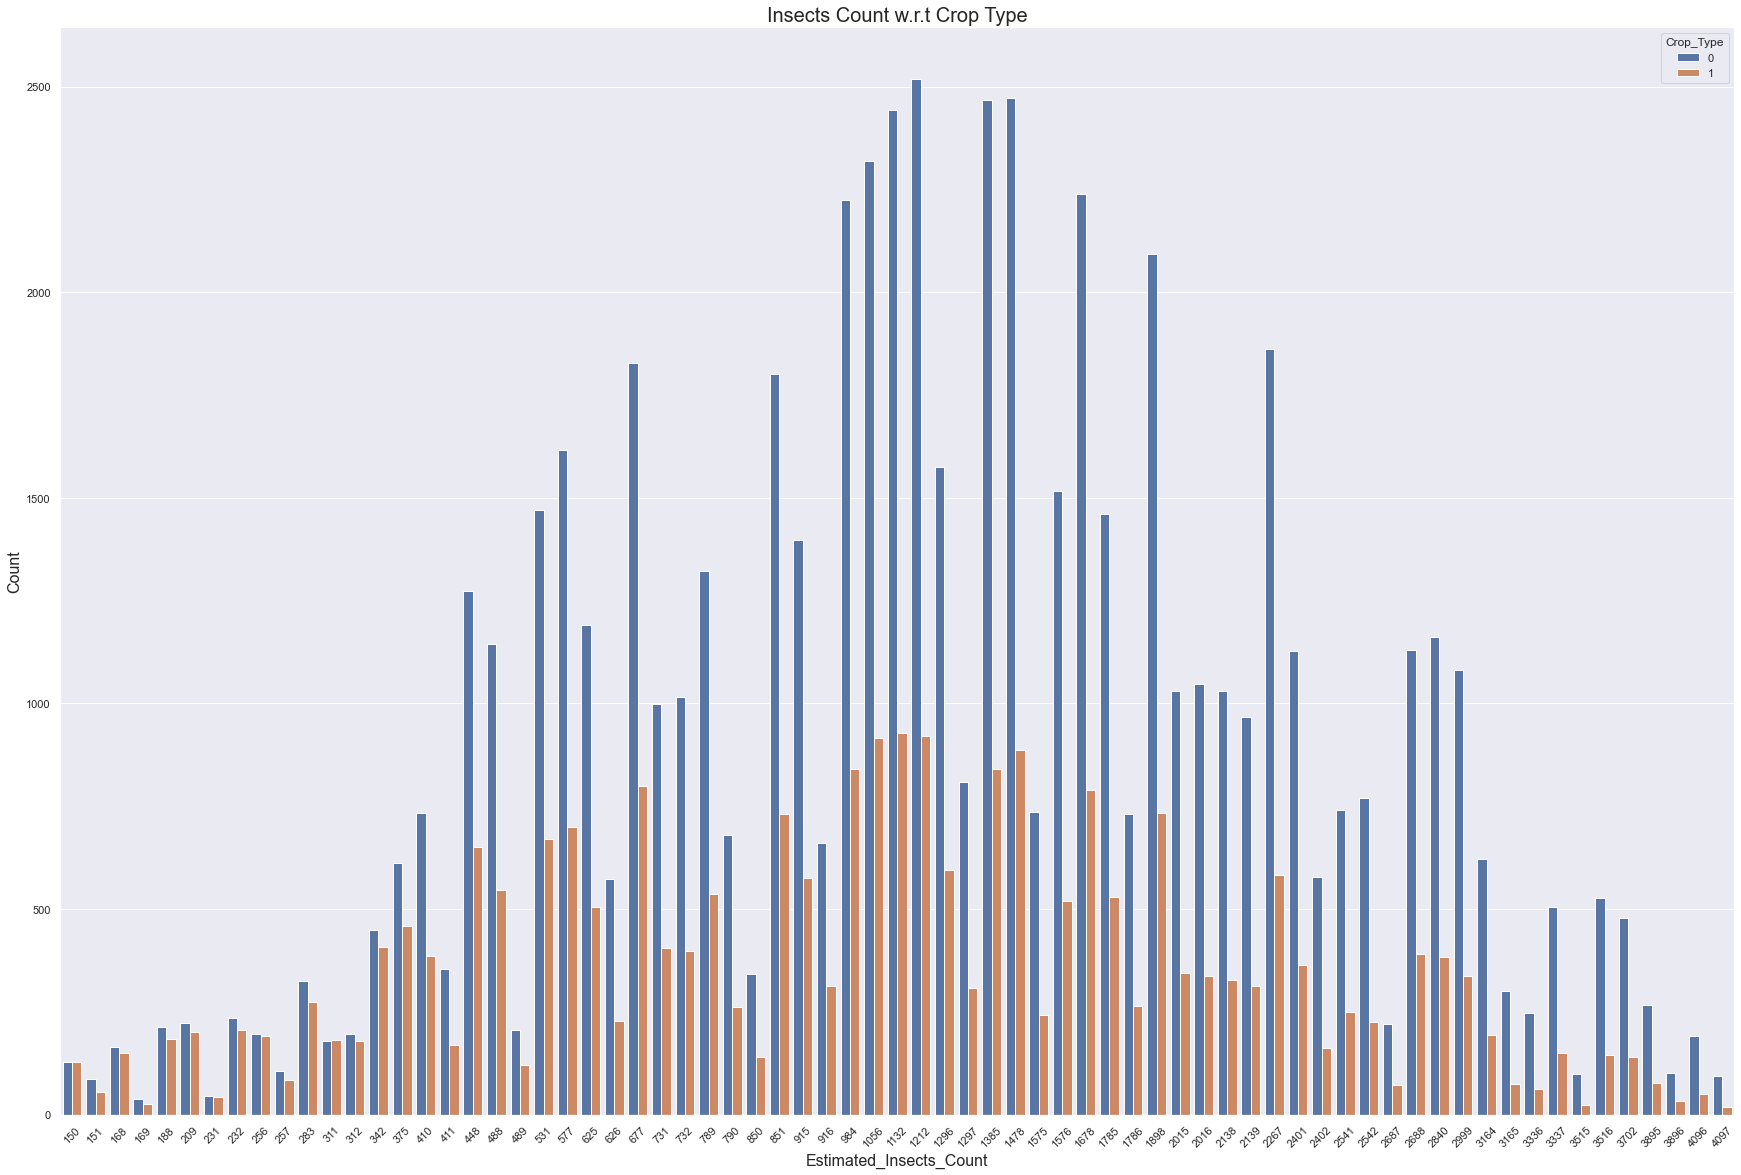

In [15]:
plt.figure(figsize=(30,20))
sns.countplot(x='Estimated_Insects_Count', data=df,hue='Crop_Type')
plt.xlabel("Estimated_Insects_Count", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Insects Count w.r.t Crop Type", fontsize=20)
plt.xticks(rotation=45)
plt.show()

##### Observation:
+ Crop 0 contains the most number of insects.

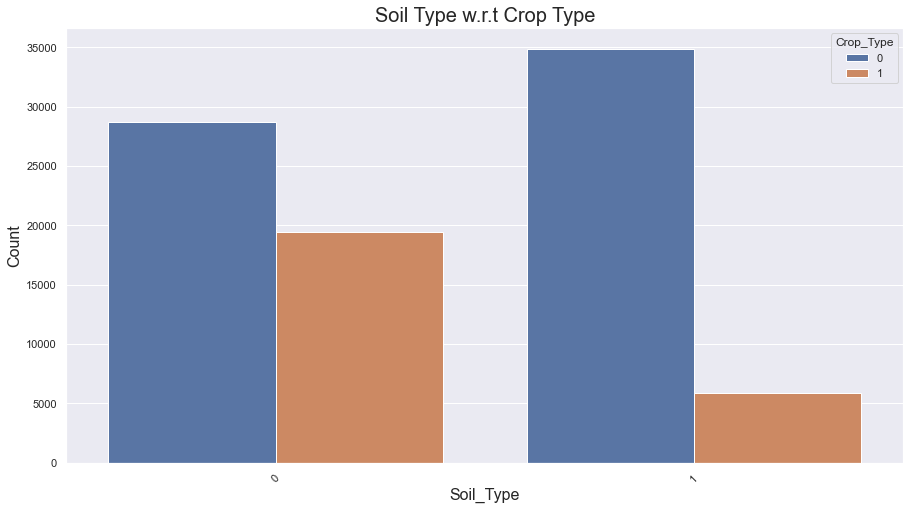

In [16]:
#plt.figure(figsize=(12,5))
sns.countplot(x='Soil_Type', data=df,hue='Crop_Type')
plt.xlabel("Soil_Type", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Soil Type w.r.t Crop Type", fontsize=20)
plt.xticks(rotation=45)
plt.show()

##### Observation:
+ Crop Type 0 is showing good results in both the soil types, like the count of the crop cultivated is high.
+ Crop Type 1 is more suitable with soil type 0 rather than soil type 1. 

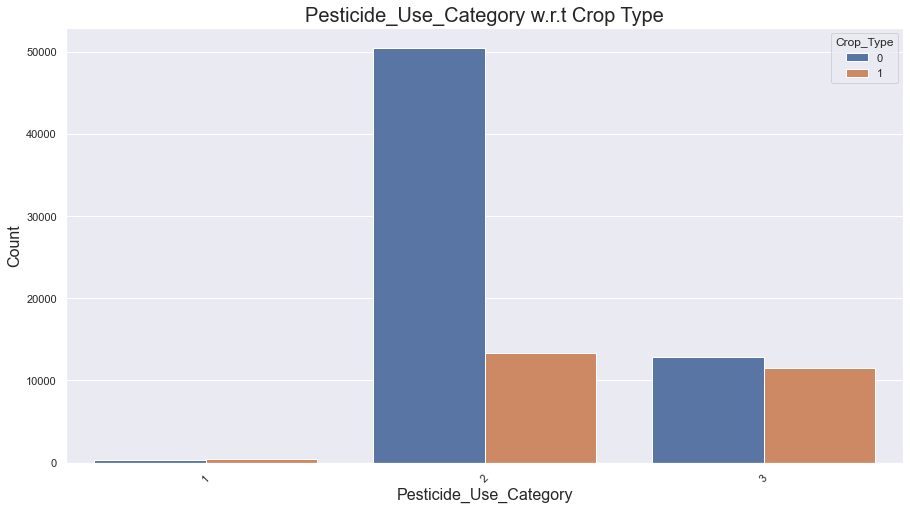

In [17]:
#plt.figure(figsize=(12,5))
sns.countplot(x='Pesticide_Use_Category', data=df,hue='Crop_Type')
plt.xlabel("Pesticide_Use_Category", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Pesticide_Use_Category w.r.t Crop Type", fontsize=20)
plt.xticks(rotation=45)
plt.show()

##### Observation:
+ Usage of Type 1 pesticide is negligible compared to type 2 and type 3.
+ Type 2 pesticide is mostly is used on crop type 0, maybe because its more prone to insects.
+ Type 3 pesticide is equally used on both the type of crops.

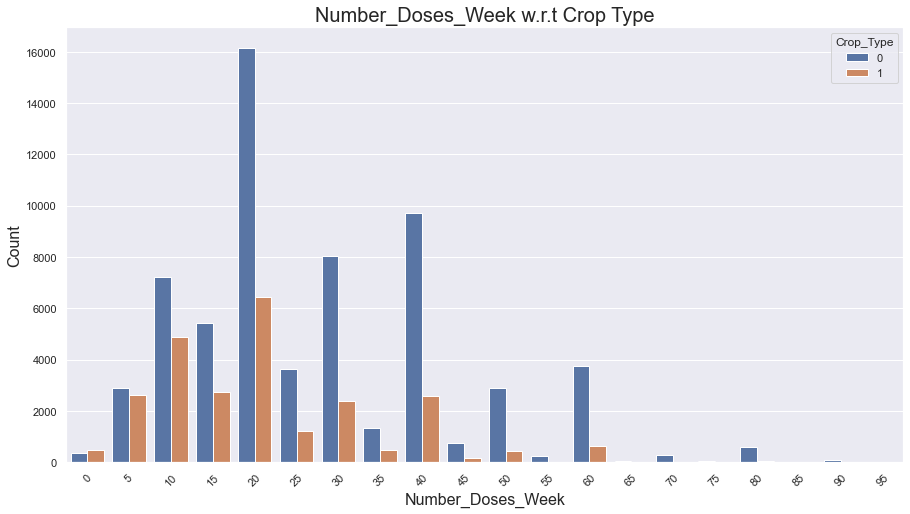

In [18]:
#plt.figure(figsize=(12,5))
sns.countplot(x='Number_Doses_Week', data=df,hue='Crop_Type')
plt.xlabel("Number_Doses_Week", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Number_Doses_Week w.r.t Crop Type", fontsize=20)
plt.xticks(rotation=45)
plt.show()

### Observation:
+ Majority of crops require 20 weeks of pesticide usage
+ Crop_type 0 count is high when compared with crop type 1 in the usage of pesticides.

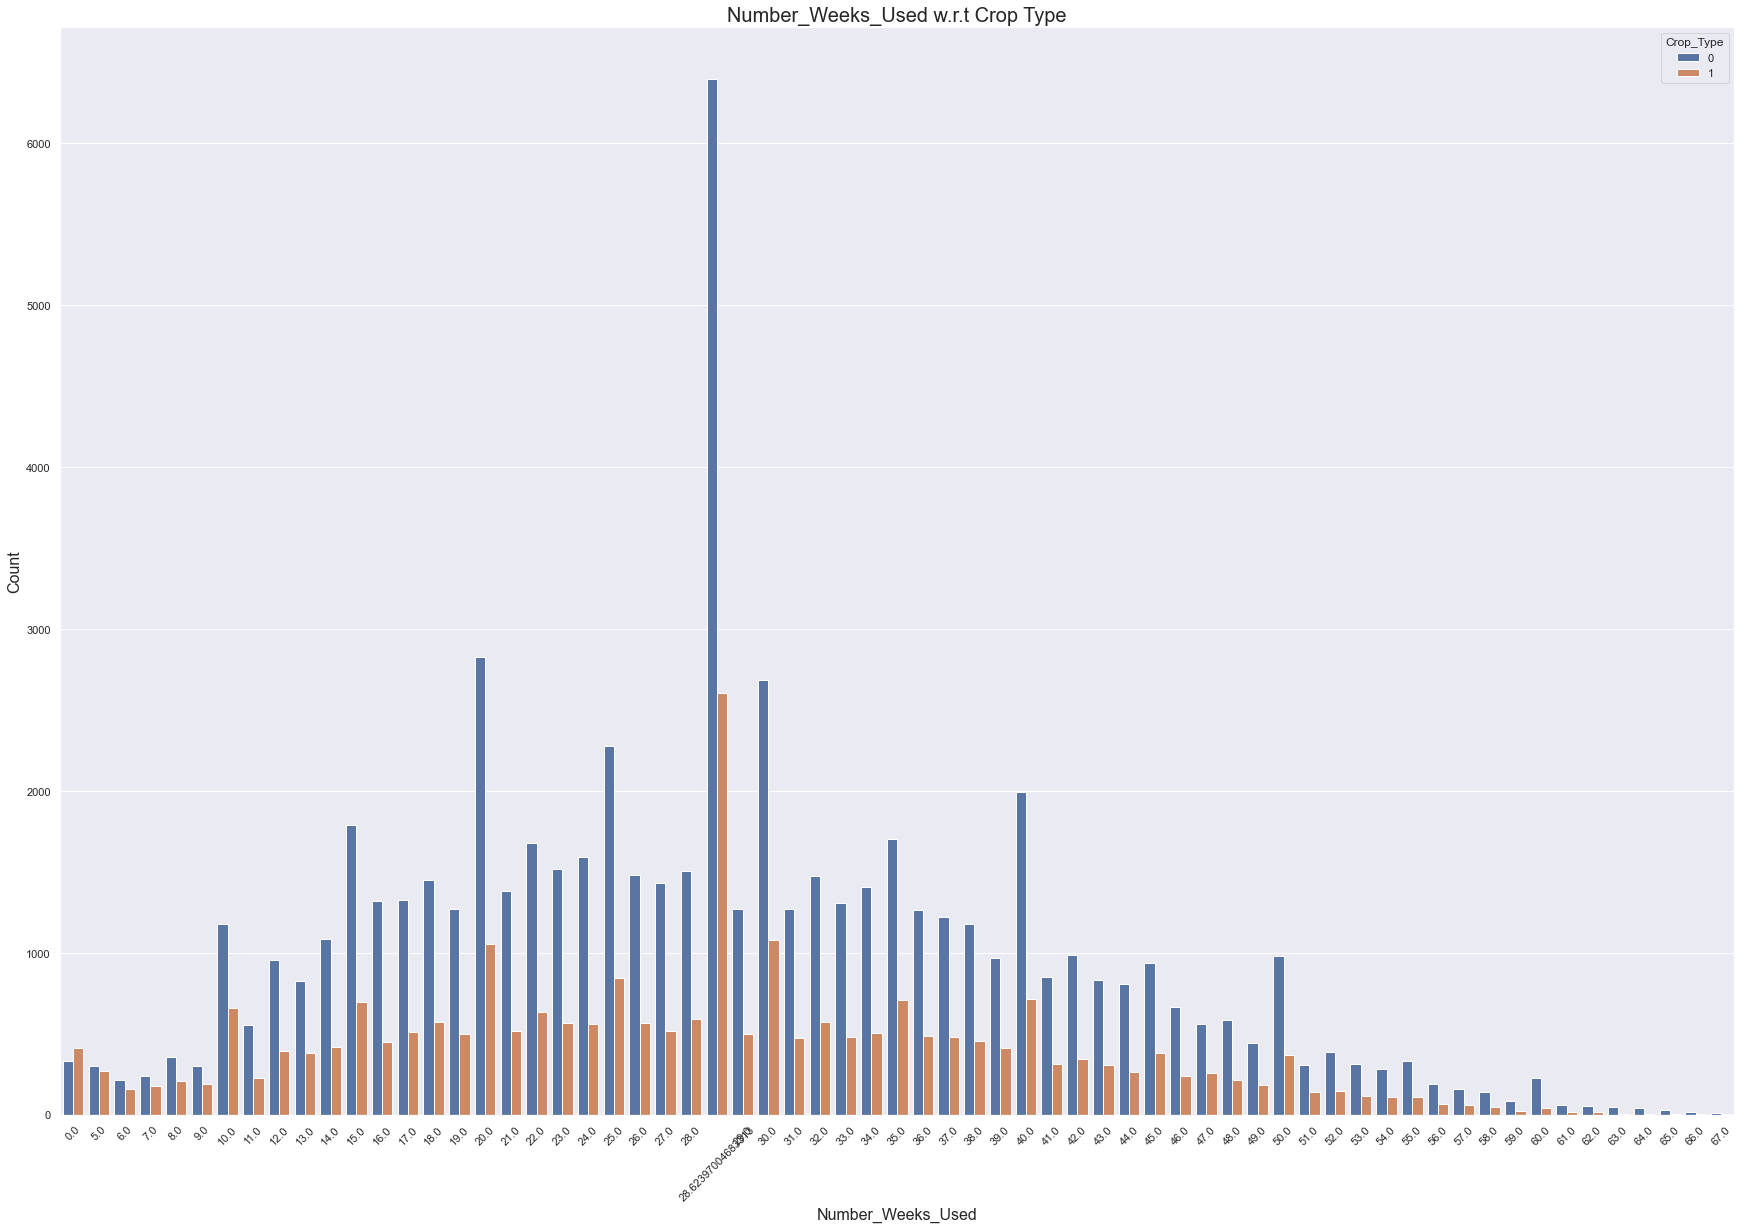

In [19]:
plt.figure(figsize=(30,20))
sns.countplot(x='Number_Weeks_Used', data=df,hue='Crop_Type')
plt.xlabel("Number_Weeks_Used", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Number_Weeks_Used w.r.t Crop Type", fontsize=20)
plt.xticks(rotation=45)
plt.show()

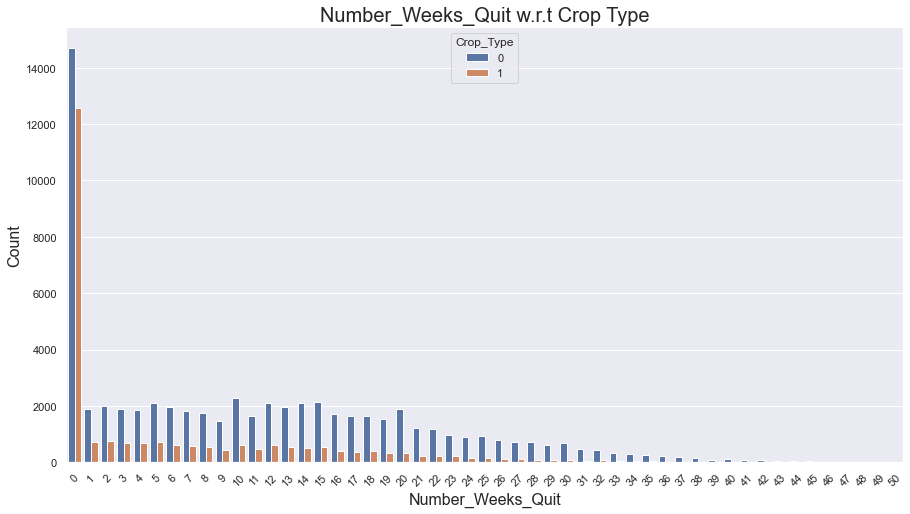

In [20]:
#plt.figure(figsize=(30,20))
sns.countplot(x='Number_Weeks_Quit', data=df,hue='Crop_Type')
plt.xlabel("Number_Weeks_Quit", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Number_Weeks_Quit w.r.t Crop Type", fontsize=20)
plt.xticks(rotation=45)
plt.show()

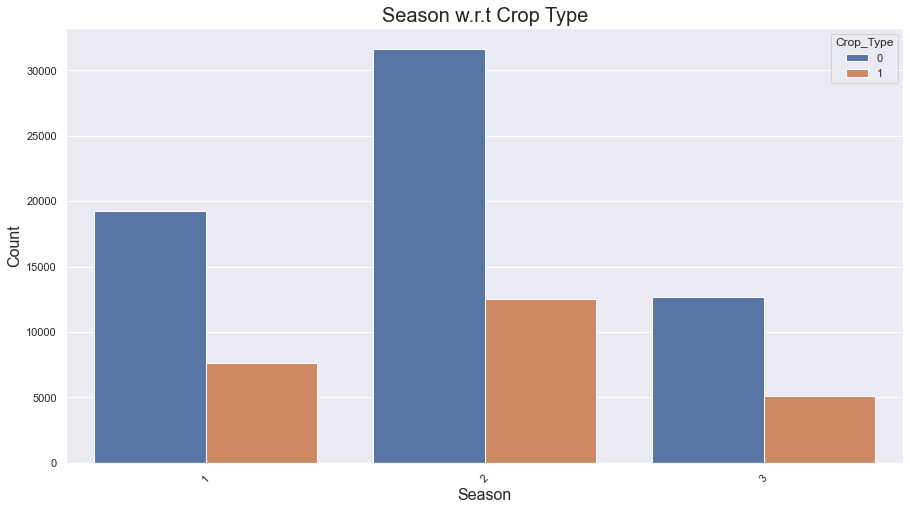

In [21]:
sns.countplot(x='Season', data=df,hue='Crop_Type')
plt.xlabel("Season", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Season w.r.t Crop Type", fontsize=20)
plt.xticks(rotation=45)
plt.show()

### Observation:
+ Type 2 season shows the highest production of both the type of crops.
+ Crop_type 0 shows major differences in production w.r.t season than crop_type 1

## Bivariate Analysis

Text(0.5, 1.0, 'Crop Damage vs Pesticide Use Category ')

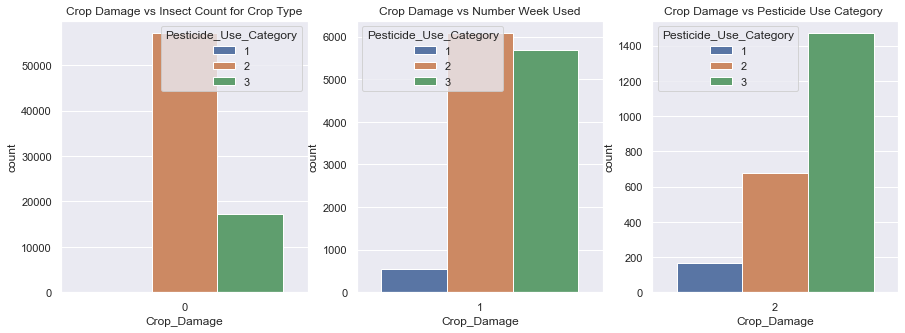

In [22]:
fig, [ax1,ax2,ax3] = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==0],ax=ax1)
ax1.set_title("Crop Damage vs Insect Count for Crop Type")
ax2=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==1],ax=ax2)
ax2.set_title("Crop Damage vs Number Week Used")
ax3=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==2],ax=ax3)
ax3.set_title("Crop Damage vs Pesticide Use Category ")

##### Observation:
+ Type 2 pesticide is much safer to use as compared to Type 3 pesticide.
+ Type 3 pesticide shows most pesticide related damage to crops.

<Figure size 864x360 with 0 Axes>

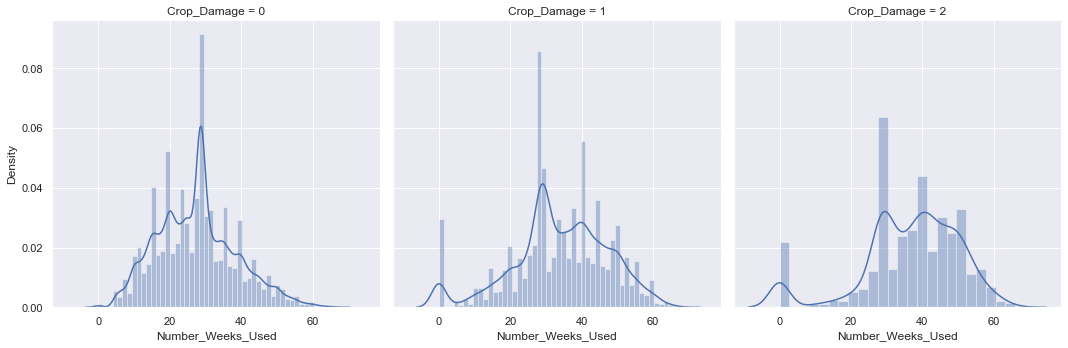

In [23]:
plt.figure(figsize=(12,5))
g= sns.FacetGrid(df, col='Crop_Damage',size=5)
g = g.map(sns.distplot, "Number_Weeks_Used")
plt.show()

##### Observation:
+ From Graph 1 we can conclude that till 20-25 weeks damage due to pesticide is negligible.
+ From Graph 3 we can see that after 20 weeks damage due to use of pesticide increrases significantly.

<AxesSubplot:xlabel='Crop_Damage', ylabel='Estimated_Insects_Count'>

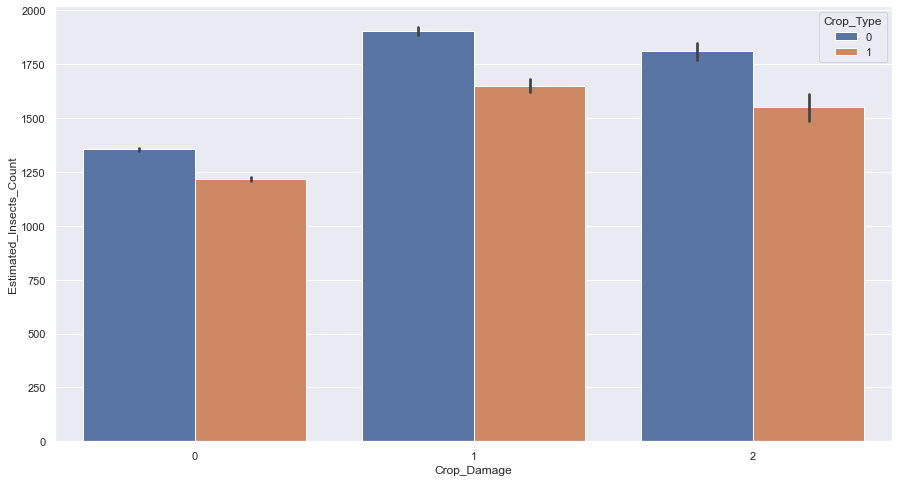

In [24]:
sns.barplot(x="Crop_Damage" ,y="Estimated_Insects_Count",hue="Crop_Type",data=df)

##### Observation:
+ Clearly observed that Most insect attacks are done on crop type 0.

<Figure size 864x360 with 0 Axes>

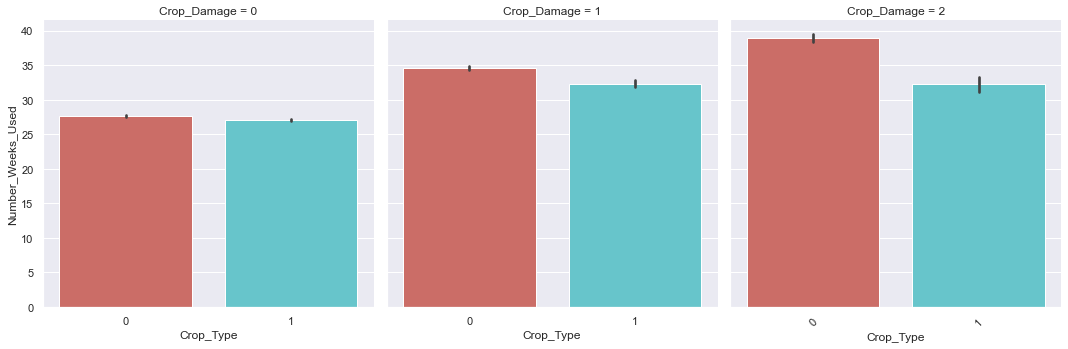

In [25]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Type',y='Number_Weeks_Used', data=df, palette="hls",kind='bar',col='Crop_Damage')
plt.xticks(rotation=45)
plt.show()

##### Observation:
+ Crop Type 0 is more vulnerable to pesticide related and other damages as compared to Type1
+ Avg. duration of pesticide related damage is lower for Crop type 1.

## Outlier Analysis

In [26]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
source                      object
dtype: object

##### We need to search for outliers in:
+ Estimated_Insects_Count
+ Number_Doses_Week
+ Number_Weeks_Used
+ Number_Weeks_Quit
##### as the unique data in rest of the columns is less than 5 and the data cannot go out of bounds. 

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

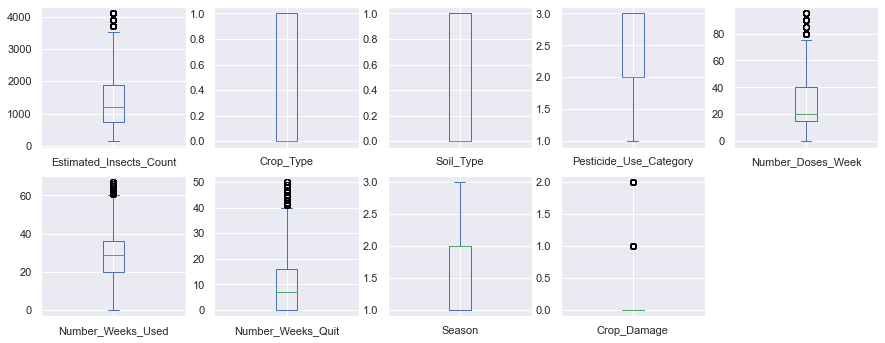

In [27]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [28]:
#Function to remove outliers in a particular column
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

#### Estimated_Insects_Count

<AxesSubplot:xlabel='Estimated_Insects_Count'>

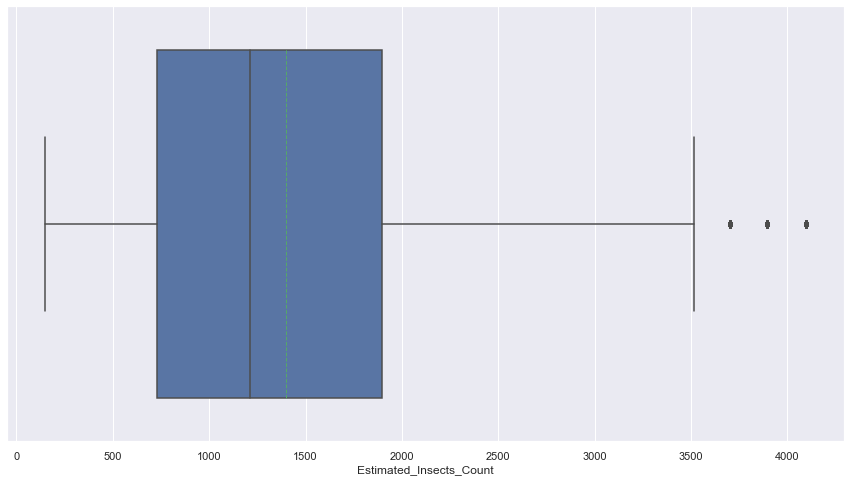

In [29]:
sns.boxplot(x='Estimated_Insects_Count',data=df,orient='V',showfliers=True,\
            meanline=True,showmeans=True)

In [30]:
app_income = df['Estimated_Insects_Count']
q1,q2,q3 = app_income.quantile([0.25,0.5,0.75])
print('q1 =',q1,'q2 =',q2,'q3 =',q3)
iqr=q3-q1
print('iqr =',iqr)

q1 = 731.0 q2 = 1212.0 q3 = 1898.0
iqr = 1167.0


In [31]:
print("Upper limit = ",(q3+1.5*iqr))
print("Lower limit = ",(q1-1.5*iqr))
print("Upper Outliers = ",(app_income>(q3+1.5*iqr)).sum())
print("Lower Outliers = ",(app_income<(q1-1.5*iqr)).sum())

Upper limit =  3648.5
Lower limit =  -1019.5
Upper Outliers =  1452
Lower Outliers =  0


In [32]:
#count before removing the outliers
df['Estimated_Insects_Count'].count()

88858

In [33]:
outlier_removed_EIC=remove_outlier_IQR(df.Estimated_Insects_Count)

In [34]:
#count after removing the outliers
outlier_removed_EIC.count()

87406

#### Number_Doses_Week

<AxesSubplot:xlabel='Number_Doses_Week'>

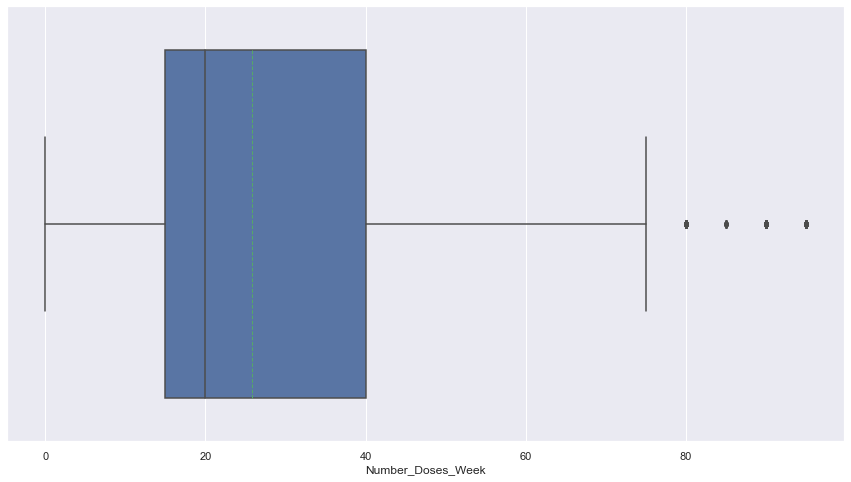

In [35]:
sns.boxplot(x='Number_Doses_Week',data=df,orient='V',showfliers=True,\
            meanline=True,showmeans=True)

In [36]:
app_income = df['Number_Doses_Week']
q1,q2,q3 = app_income.quantile([0.25,0.5,0.75])
print('q1 =',q1,'q2 =',q2,'q3 =',q3)
iqr=q3-q1
print('iqr =',iqr)

q1 = 15.0 q2 = 20.0 q3 = 40.0
iqr = 25.0


In [37]:
print("Upper limit = ",(q3+1.5*iqr))
print("Lower limit = ",(q1-1.5*iqr))
print("Upper Outliers = ",(app_income>(q3+1.5*iqr)).sum())
print("Lower Outliers = ",(app_income<(q1-1.5*iqr)).sum())

Upper limit =  77.5
Lower limit =  -22.5
Upper Outliers =  796
Lower Outliers =  0


In [38]:
#count before removing the outliers
df['Number_Doses_Week'].count()

88858

In [39]:
outlier_removed_NDW=remove_outlier_IQR(df.Number_Doses_Week)

In [40]:
#count after removing the outliers
outlier_removed_NDW.count()

88062

#### Number_Weeks_Used

<AxesSubplot:xlabel='Number_Weeks_Used'>

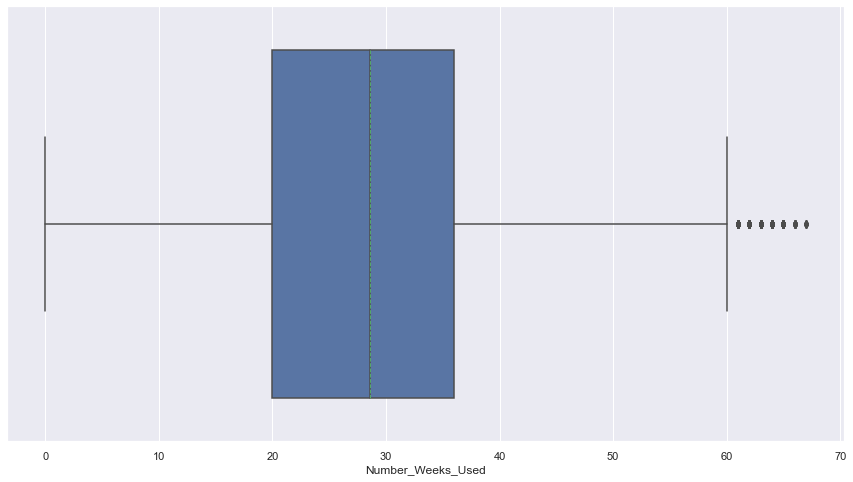

In [41]:
sns.boxplot(x='Number_Weeks_Used',data=df,orient='V',showfliers=True,\
            meanline=True,showmeans=True)

In [42]:
app_income = df['Number_Weeks_Used']
q1,q2,q3 = app_income.quantile([0.25,0.5,0.75])
print('q1 =',q1,'q2 =',q2,'q3 =',q3)
iqr=q3-q1
print('iqr =',iqr)

q1 = 20.0 q2 = 28.62397004683313 q3 = 36.0
iqr = 16.0


In [43]:
print("Upper limit = ",(q3+1.5*iqr))
print("Lower limit = ",(q1-1.5*iqr))
print("Upper Outliers = ",(app_income>(q3+1.5*iqr)).sum())
print("Lower Outliers = ",(app_income<(q1-1.5*iqr)).sum())

Upper limit =  60.0
Lower limit =  -4.0
Upper Outliers =  285
Lower Outliers =  0


In [44]:
#count before removing the outliers
df['Number_Weeks_Used'].count()

88858

In [45]:
outlier_removed_NWU=remove_outlier_IQR(df.Number_Weeks_Used)

In [46]:
#count after removing the outliers
outlier_removed_NWU.count()

88573

#### Number_Weeks_Quit

<AxesSubplot:xlabel='Number_Weeks_Quit'>

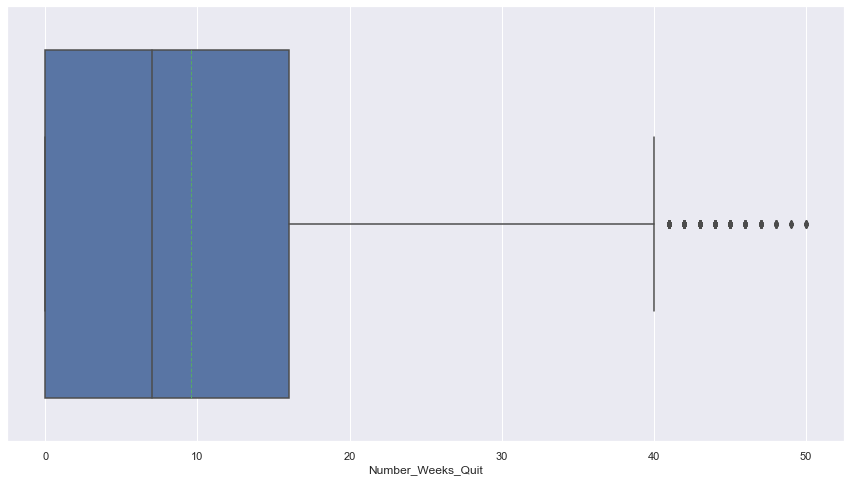

In [47]:
sns.boxplot(x='Number_Weeks_Quit',data=df,orient='V',showfliers=True,\
            meanline=True,showmeans=True)

In [48]:
app_income = df['Number_Weeks_Quit']
q1,q2,q3 = app_income.quantile([0.25,0.5,0.75])
print('q1 =',q1,'q2 =',q2,'q3 =',q3)
iqr=q3-q1
print('iqr =',iqr)

q1 = 0.0 q2 = 7.0 q3 = 16.0
iqr = 16.0


In [49]:
print("Upper limit = ",(q3+1.5*iqr))
print("Lower limit = ",(q1-1.5*iqr))
print("Upper Outliers = ",(app_income>(q3+1.5*iqr)).sum())
print("Lower Outliers = ",(app_income<(q1-1.5*iqr)).sum())

Upper limit =  40.0
Lower limit =  -24.0
Upper Outliers =  343
Lower Outliers =  0


In [50]:
#count before removing the outliers
df['Number_Weeks_Quit'].count()

88858

In [51]:
outlier_removed_NWQ=remove_outlier_IQR(df.Number_Weeks_Quit)

In [52]:
#count after removing the outliers
outlier_removed_NWQ.count()

88515

## Storing cleaned data in new dataframe

In [53]:
df1=pd.concat([df['ID'],outlier_removed_EIC,df['Crop_Type'],df['Soil_Type'],df['Pesticide_Use_Category'],outlier_removed_NDW,outlier_removed_NWU,outlier_removed_NWQ,df['Season'],df['Crop_Damage'],df['source']],axis=1)
df1

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188.0,1,0,1,0.0,0.0,0.0,1,0,train
1,F00000003,209.0,1,0,1,0.0,0.0,0.0,2,1,train
2,F00000004,257.0,1,0,1,0.0,0.0,0.0,2,1,train
3,F00000005,257.0,1,1,1,0.0,0.0,0.0,2,1,train
4,F00000006,342.0,1,0,1,0.0,0.0,0.0,2,1,train
...,...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337.0,1,0,2,10.0,12.0,NaN,3,0,train
88854,F00155938,3516.0,1,0,2,10.0,20.0,38.0,1,0,train
88855,F00155939,3516.0,1,0,2,15.0,40.0,8.0,2,0,train
88856,F00155942,NaN,1,0,2,10.0,25.0,18.0,3,0,train


Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

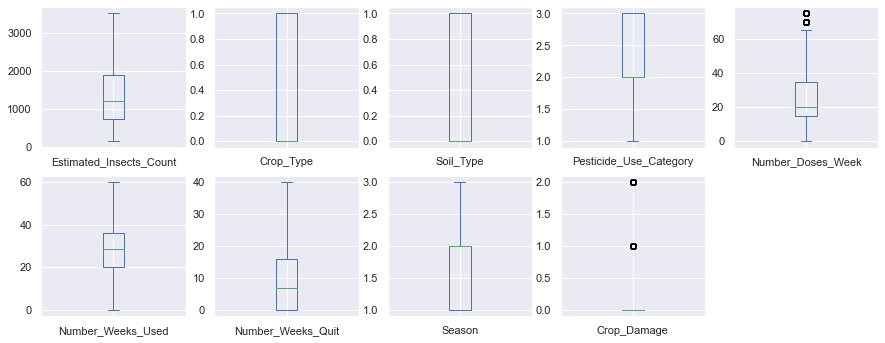

In [54]:
df1.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

##### Observation:
+ we can see that outliers have been removed in Insect_Count, Number_Doses_Weeks,Number_Weeks_Quit

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88858 entries, 0 to 88857
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  87406 non-null  float64
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88062 non-null  float64
 6   Number_Weeks_Used        88573 non-null  float64
 7   Number_Weeks_Quit        88515 non-null  float64
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
 10  source                   88858 non-null  object 
dtypes: float64(4), int64(5), object(2)
memory usage: 8.1+ MB


In [56]:
df1.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,87406.000000,88858.000000,88858.000000,88858.000000,88062.000000,88573.000000,88515.000000,88858.000000,88858.000000
mean,1358.089433,0.284375,0.458417,2.264186,25.345325,28.513539,9.459199,1.896959,0.190562
std,793.701991,0.451119,0.498271,0.461772,14.681679,11.603372,9.692837,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.623970,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,35.000000,36.000000,16.000000,2.000000,0.000000
max,3516.000000,1.000000,1.000000,3.000000,75.000000,60.000000,40.000000,3.000000,2.000000


In [57]:
df1.isnull().sum()

ID                            0
Estimated_Insects_Count    1452
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week           796
Number_Weeks_Used           285
Number_Weeks_Quit           343
Season                        0
Crop_Damage                   0
source                        0
dtype: int64

#### Handling the null values

In [58]:
#Replacing null values with mean of the particular coloumn

df1['Estimated_Insects_Count'].fillna(df1['Estimated_Insects_Count'].mean(),inplace=True)
df1['Number_Doses_Week'].fillna(df1['Number_Doses_Week'].mean(),inplace=True)
df1['Number_Weeks_Used'].fillna(df1['Number_Weeks_Used'].mean(),inplace=True)
df1['Number_Weeks_Quit'].fillna(df1['Number_Weeks_Quit'].mean(),inplace=True)

In [59]:
df1.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
source                     0
dtype: int64

## Skew Analysis

In [60]:
df1.skew()

Estimated_Insects_Count    0.702057
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.756633
Number_Weeks_Used          0.213646
Number_Weeks_Quit          0.831341
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

array([[<AxesSubplot:title={'center':'Estimated_Insects_Count'}>,
        <AxesSubplot:title={'center':'Crop_Type'}>,
        <AxesSubplot:title={'center':'Soil_Type'}>,
        <AxesSubplot:title={'center':'Pesticide_Use_Category'}>],
       [<AxesSubplot:title={'center':'Number_Doses_Week'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Used'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Quit'}>,
        <AxesSubplot:title={'center':'Season'}>],
       [<AxesSubplot:title={'center':'Crop_Damage'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

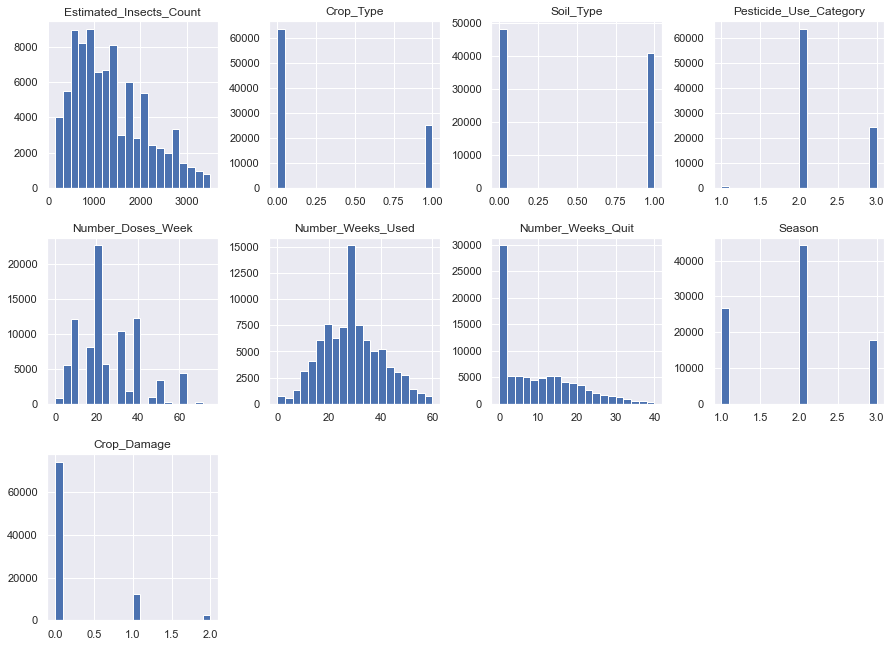

In [61]:
df1.hist(figsize=(15,15), layout=(4,4), bins=20)

##### Observation
+ We can see that all the data is normally distributed.

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88858 entries, 0 to 88857
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  float64
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  float64
 6   Number_Weeks_Used        88858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  float64
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
 10  source                   88858 non-null  object 
dtypes: float64(4), int64(5), object(2)
memory usage: 8.1+ MB


<AxesSubplot:>

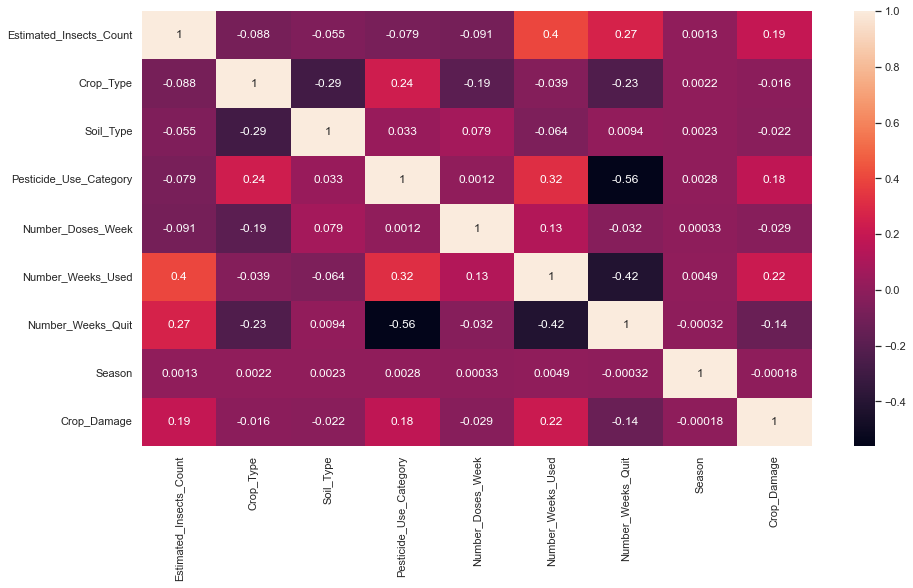

In [63]:
sns.heatmap(df1.corr(),annot=True)

In [64]:
df1.to_csv('harvest_cleaned_dataset.csv',index=False)